In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.datasets import load_digits
import shap
import matplotlib.pyplot as plt 
%matplotlib inline  
import tensorflow as tf# tensor flow


## Deep Learning Introduction
We want to find mappings to our inputs to some outputs(some neurons) e.g.<br>
![alt text](images/deep_learning.jpeg) <br>
- each of those connections have their own **unique weight**
- 1 Hidden layer $\rightarrow$ **Neuaral Network**
- 2 $\leq$ x Hidden layer $\rightarrow$ **Deep Neuaral Network** <br>
![alt text](images/deep_learning2.png) <br>
- Outputs also have their **Sinusoidal Activation Function as well**, and adding all of them = 1
- We take the arg max of those probabilities and that is the output


# Load Digits Dataset (MNIST)
- Data: 28*28 pxls represented as images of numbers
    - Grayscale image: input 0-255 (white-black)
- Target: number 0-9

In [65]:
# load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


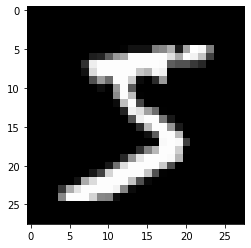

In [70]:
plt.imshow(x_train[0], cmap="gray")

In [71]:
# Normalize (puts values to 0-1) which makes
# the neural network easier to learn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [72]:
# 2 types of deep learning models
# sequential is most common one
seq_model = tf.keras.models.Sequential()
# Add our flatten input layer
seq_model.add(tf.keras.layers.Flatten())
# Dense(#neurons in layer, activation f(x))
# Added two hidden layers
seq_model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
seq_model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# Add our output layer
seq_model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

#a NN does not aim to maximize accuracy
# NN alwasy tries to minimize loss (degree of error)
# so the way to calculate loss impacts greatly the 
# NN performance
seq_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
seq_model.fit(x_train, y_train, epochs=3)

Epoch 1/3


2022-02-03 00:24:45.003641: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2647 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9772


In [73]:
val_loss, val_acc = seq_model.evaluate(x_test, y_test)
val_loss, val_acc

313/313 [==============================] - 1s 1ms/step - loss: 0.0956 - accuracy: 0.9713


(0.09562402218580246, 0.9713000059127808)

Model predicted:  5
Actual number:


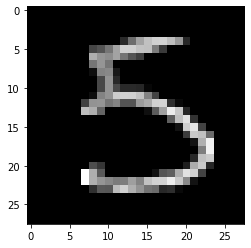

In [79]:
# seq_model.save('epic_num_reader.model')
# load_model = tf.keras.models.load_model('epic_num_reader.model')
example = 15
pred = seq_model.predict([x_test])
print("Model predicted: ",np.argmax(pred[example]))
print("Actual number:")
plt.imshow(x_test[example], cmap="gray")

# Load Digits Dataset (sklearn)
- Data: 8*8 pxls represented as images of numbers
    - Grayscale image: input 0-16 (white-black)
- Target: number 0-9
- Samples: 1797 ($\approx$180 samples per class)

In [6]:
X, y = load_digits(return_X_y=True, as_frame=True)

In [60]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


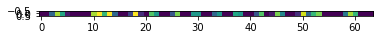

In [58]:
X[0:1].to_numpy()
plt.imshow(X[0:1].to_numpy())